In [1]:
# %load test_tools.py
from openpiv.tools import imread, save, display_vector_field
from openpiv.pyprocess import extended_search_area_piv, get_coordinates
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.testing import compare

# np.seterr(all='raise')

file_a =  '../examples/test1/exp1_001_a.bmp'
file_b =  '../examples/test1/exp1_001_b.bmp'


def test_imread(image_file=file_a):
    a = imread(image_file)
    assert a.shape == (369, 511)
    assert a[0, 0] == 8
    assert a[-1, -1] == 15


def test_display_vector_field(file_a=file_a, file_b=file_b):
    a = imread(file_a)
    b = imread(file_b)
    
    window_size = 16
    overlap = 8
    search_area_size = 32
    
    vel = extended_search_area_piv(a, b, window_size, search_area_size=search_area_size, overlap=overlap)
    x, y = get_coordinates(a.shape, search_area_size=search_area_size, overlap=overlap)

    save(x, y, vel[0], vel[1], np.zeros_like(vel[0]), 'tmp.txt')
    display_vector_field('tmp.txt', on_img=True, image_name=file_a)
    plt.savefig('tmp.png')
    res = compare.compare_images('tmp.png','test_tools.png',0.001)
    assert res is None


In [2]:
test_imread(file_a)

/home/user/miniconda3/envs/windef/lib/python3.8/site-packages/matplotlib/quiver.py:670: RuntimeWarning: Mean of empty slice.
  amean = a.mean()
/home/user/miniconda3/envs/windef/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


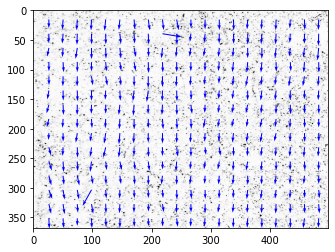

<Figure size 432x288 with 0 Axes>

In [3]:
test_display_vector_field(file_a, file_b)